In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


# Выгружаем данные

In [2]:
total = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Просепт/data/data/total_table.csv')
tt = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Просепт/data/data/for_model.csv')
tt_den = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Просепт/data/data/tt_den.csv')
tt_den_idx = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Просепт/data/data/tt_den_idx.csv')
tt_test_den = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Просепт/data/data/tt_test_den.csv')

In [3]:
tt_test_den.head()

,Unnamed: 0,idx,distance,query_idx,true_answer_for_query_idx,true_answer_for_idx,target,quantity,dimension,diff_price,0,1,unknown
0,0,203,0.000000,1213,328,328,1,1,1,108.0,0.0,0.0,1.0
1,1,71,0.432659,1213,328,492,0,0,0,935.0,0.0,0.0,1.0
2,2,185,0.533340,1213,328,219,0,0,1,913.0,0.0,0.0,1.0
3,3,188,0.647902,1213,328,327,0,1,1,92.0,0.0,0.0,1.0
4,4,439,0.693470,1213,328,330,0,1,1,20.0,0.0,0.0,1.0


In [4]:
subd_base = {k: v for k, v in enumerate(tt_test_den['true_answer_for_idx'].to_list())} # словарь для сопоставления индекса и id
subd_query = {k: v for k, v in enumerate(tt_test_den['true_answer_for_query_idx'].to_list())}


In [5]:
pd.DataFrame([subd_base])

,0,1,2,3,4,5,6,7,8,9,...,16805,16806,16807,16808,16809,16810,16811,16812,16813,16814
0,328,492,219,327,330,503,504,436,491,218,...,149,155,154,156,157,158,159,150,161,160


In [6]:
tt_test_den.head()

,Unnamed: 0,idx,distance,query_idx,true_answer_for_query_idx,true_answer_for_idx,target,quantity,dimension,diff_price,0,1,unknown
0,0,203,0.000000,1213,328,328,1,1,1,108.0,0.0,0.0,1.0
1,1,71,0.432659,1213,328,492,0,0,0,935.0,0.0,0.0,1.0
2,2,185,0.533340,1213,328,219,0,0,1,913.0,0.0,0.0,1.0
3,3,188,0.647902,1213,328,327,0,1,1,92.0,0.0,0.0,1.0
4,4,439,0.693470,1213,328,330,0,1,1,20.0,0.0,0.0,1.0


In [7]:
tt_den_shuffle = shuffle(tt_test_den, random_state=12345) # делаем перемешку т.к у нас подряд идут данные каждые 15 раз

In [8]:
tt_den_shuffle

,Unnamed: 0,idx,distance,query_idx,true_answer_for_query_idx,true_answer_for_idx,target,quantity,dimension,diff_price,0,1,unknown
11405,11405,96,1.767744,1373,294,498,0,0,0,283.0,0.0,0.0,1.0
9975,9975,95,0.972628,1502,426,426,1,1,1,876.0,0.0,1.0,0.0
4223,4223,360,1.278171,775,253,415,0,0,1,225.0,0.0,0.0,1.0
5032,5032,35,1.000000,515,381,504,0,0,0,515.0,1.0,0.0,0.0
1048,1048,64,1.547211,1059,393,488,0,0,0,92.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,7709,478,1.689843,818,123,57,0,1,1,96.0,0.0,0.0,1.0
4094,4094,433,1.419306,547,324,329,0,0,1,476.0,1.0,0.0,0.0
11689,11689,326,0.641840,438,76,72,0,0,1,1001.0,1.0,0.0,0.0
2177,2177,284,0.216198,326,405,403,0,0,1,3145.0,1.0,0.0,0.0


# Делим на выборки

In [9]:
train, test = train_test_split(tt_den_shuffle, test_size=0.1, random_state=12345) # делим на выборки

In [10]:
print(train.shape, test.shape)

(15133, 13) (1682, 13)


In [11]:
features_train = train.drop(['target', 'Unnamed: 0', 'idx', 'query_idx', 'true_answer_for_query_idx', 'true_answer_for_idx'], axis=1)
target_train = train['target']
features_test = test.drop(['target', 'Unnamed: 0', 'idx', 'query_idx', 'true_answer_for_query_idx', 'true_answer_for_idx'], axis=1)
target_test = test['target']
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape)

(15133, 7) (15133,) (1682, 7) (1682,)


In [12]:
features_train.head()

,distance,quantity,dimension,diff_price,0,1,unknown
6207,0.866330,0,1,106.0,0.0,0.0,1.0
6277,1.742581,1,1,83.0,0.0,0.0,1.0
570,0.381166,1,1,636.0,0.0,0.0,1.0
9882,1.668305,0,0,807.0,0.0,0.0,1.0
2790,0.000000,0,1,364.0,0.0,0.0,1.0


# Смотрим баланс классов

0    0.937913
1    0.062087
Name: target, dtype: float64

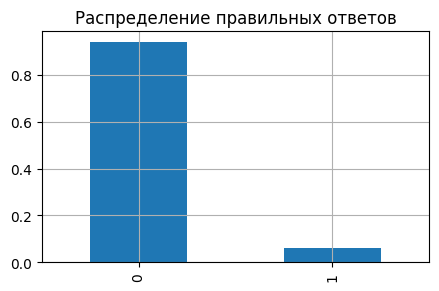

In [13]:
class_frequency = tt_den_shuffle['target'].value_counts(normalize=True)
display(class_frequency)
class_frequency.plot(kind='bar', grid=True, figsize=(5,3));
plt.title('Распределение правильных ответов');

## Создаем функции для балансировки классов

In [14]:
def downsample(features, target, fraction):      #уменьшение выборки
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
                                    [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
                                    [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
                                    features_downsampled, target_downsampled, random_state=42)
    return features_downsampled, target_downsampled


In [15]:
def upsample(features, target, repeat):        #увеличение выборки
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

# Подборка модели обучения и балансировки 

## Проверяем показатели при уменьшении выборки

In [16]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.06)

display(features_downsampled.head(5))
display(target_downsampled.head(5))

,distance,quantity,dimension,diff_price,0,1,unknown
1486,0.412963,1,1,0.0,0.0,0.0,1.0
3634,1.273084,0,0,418.0,0.0,0.0,1.0
7021,0.150488,1,1,67.0,0.0,0.0,1.0
14998,1.475616,0,1,1424.0,0.0,0.0,1.0
12795,0.465969,1,1,0.0,0.0,0.0,1.0


1486     1
3634     0
7021     1
14998    0
12795    1
Name: target, dtype: int64

1    0.524819
0    0.475181
Name: target, dtype: float64

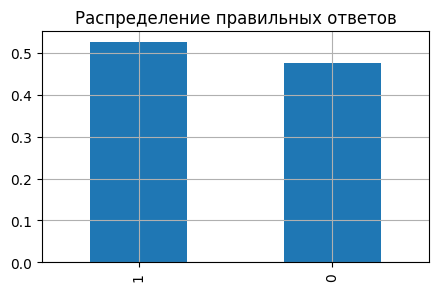

In [17]:
class_frequency = target_downsampled.value_counts(normalize=True)
display(class_frequency)
class_frequency.plot(kind='bar', grid=True, figsize=(5,3));
plt.title('Распределение правильных ответов');

### Модель Случайный лес при downsample

In [18]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
result = cross_val_score(model, features_downsampled, target_downsampled, cv=5, scoring='roc_auc').mean()
print(f'Оценка AUC ROC на кросс валидации: {result:.3f}')

Оценка AUC ROC на кросс валидации: 0.969


### Модель Случайный лес при downsample

In [19]:
# steps = ['lg', LogisticRegression(random_state=12345, C=15.0]
# pipeline = Pipeline(steps)
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
result = cross_val_score(model, features_downsampled, target_downsampled, cv=5, scoring='roc_auc').mean()
print(f'Оценка AUC ROC на кросс валидации: {result:.3f}')

Оценка AUC ROC на кросс валидации: 0.889


### ROC кривая для Леса с downsample

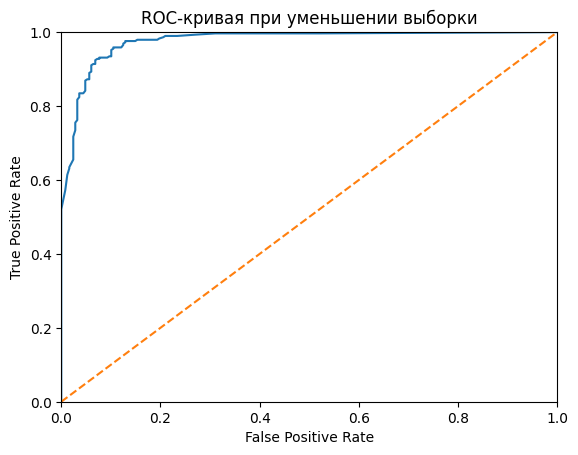

In [20]:
ft, fv, target_t, target_v = train_test_split(features_downsampled, target_downsampled, test_size=0.3, random_state=12345) 

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(ft, target_t)
predict = model.predict(fv)
result_test = roc_auc_score(target_v, predict)
probabilities_valid = model.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_v, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая при уменьшении выборки")

plt.show()

## Проверяем показатели при увеличении выборки

In [21]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 15)

display(features_upsampled.head(5))
display(target_upsampled.head(5))

,distance,quantity,dimension,diff_price,0,1,unknown
15529,0.688545,1,1,38.0,0.0,0.0,1.0
2131,0.240500,1,1,0.0,0.0,0.0,1.0
11686,0.528166,1,1,0.0,0.0,1.0,0.0
12135,0.467038,0,1,97.0,0.0,0.0,1.0
4003,0.746735,1,0,2895.0,1.0,0.0,0.0


15529    1
2131     1
11686    1
12135    1
4003     0
Name: target, dtype: int64

0    0.50136
1    0.49864
Name: target, dtype: float64

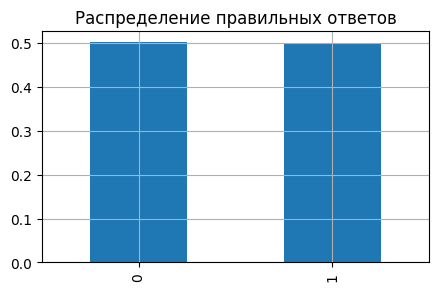

In [22]:
class_frequency = target_upsampled.value_counts(normalize=True)
display(class_frequency)
class_frequency.plot(kind='bar', grid=True, figsize=(5,3));
plt.title('Распределение правильных ответов');

### Случайный лес с upsample

In [23]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
result = cross_val_score(model, features_upsampled, target_upsampled, cv=5, scoring='roc_auc').mean()
print(f'Оценка AUC ROC на кросс валидации: {result:.3f}')

Оценка AUC ROC на кросс валидации: 0.999


### Дерево решений с upsample

In [24]:
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
result = cross_val_score(model, features_upsampled, target_upsampled, cv=5, scoring='roc_auc').mean()
print(f'Оценка AUC ROC на кросс валидации: {result:.3f}')

Оценка AUC ROC на кросс валидации: 0.989


### ROC кривая для Леса с upsample

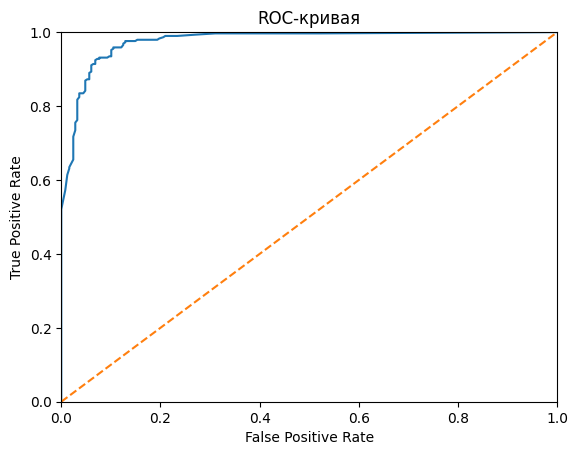

In [26]:
ft_up, fv_up, target_t_up, target_v_up = train_test_split(features_downsampled, target_downsampled, test_size=0.3, random_state=12345) 
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(ft_up, target_t_up)
predict_up = model.predict(fv_up)
probabilities_valid = model.predict_proba(fv_up)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_v_up, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")

plt.show()

In [27]:
pd.DataFrame(model.feature_importances_) # влияние на обучение по признакам

,0
0,0.300079
1,0.323001
2,0.028808
3,0.267384
4,0.029383
5,0.039436
6,0.011909


# Финальное тестирование

In [28]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
test = model.predict(features_test)
result = roc_auc_score(test, target_test)
print(f'Результат на тесте AUC ROC: {result:.3f}')

Результат на тесте AUC ROC: 0.857
